In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imagenetsmall/test_set/test_set/test_set/fungus/n12992868_13783.JPEG
/kaggle/input/imagenetsmall/test_set/test_set/test_set/fungus/n12992868_14707.JPEG
/kaggle/input/imagenetsmall/test_set/test_set/test_set/fungus/n12992868_14495.JPEG
/kaggle/input/imagenetsmall/test_set/test_set/test_set/fungus/n12992868_13918.JPEG
/kaggle/input/imagenetsmall/test_set/test_set/test_set/fungus/n12992868_13482.JPEG
/kaggle/input/imagenetsmall/test_set/test_set/test_set/fungus/n12992868_14554.JPEG
/kaggle/input/imagenetsmall/test_set/test_set/test_set/fungus/n12992868_13484.JPEG
/kaggle/input/imagenetsmall/test_set/test_set/test_set/fungus/n12992868_13507.JPEG
/kaggle/input/imagenetsmall/test_set/test_set/test_set/fungus/n12992868_14662.JPEG
/kaggle/input/imagenetsmall/test_set/test_set/test_set/fungus/n12992868_13529.JPEG
/kaggle/input/imagenetsmall/test_set/test_set/test_set/fungus/n12992868_14483.JPEG
/kaggle/input/imagenetsmall/test_set/test_set/test_set/fungus/n12992868_14314.JPEG
/kag

In [4]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [5]:
path = '../input/imagenetsmall/training_set/training_set/training_set'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 4000 images belonging to 10 classes.


In [6]:
type(train)
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [7]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 10)
Image Size of first image :  (227, 227, 3)
Output of first image :  (10,)


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

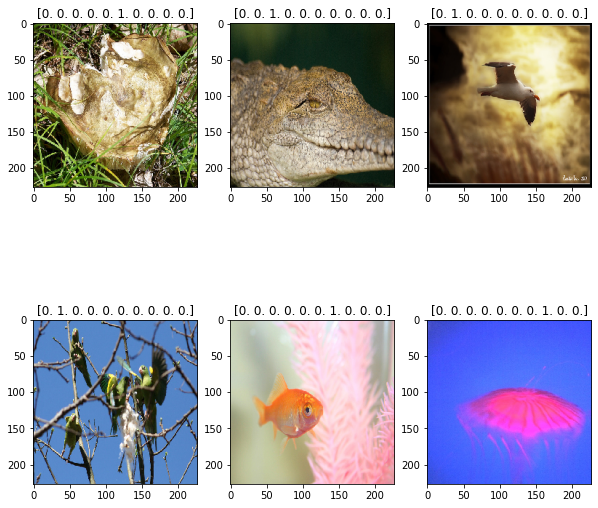

In [11]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])


In [14]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(10,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [15]:
alex = AlexNet(train[0][0].shape[1:])

2022-11-15 18:56:42.024561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 18:56:42.130812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 18:56:42.131614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 18:56:42.132956: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [16]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024

In [18]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [47]:
alex.fit(train,epochs=70)

Epoch 1/70
125/125 [==============================] - 26s 205ms/step - loss: 1.8432 - accuracy: 0.3925
Epoch 2/70
125/125 [==============================] - 29s 232ms/step - loss: 1.3868 - accuracy: 0.5020
Epoch 3/70
125/125 [==============================] - 28s 223ms/step - loss: 1.2800 - accuracy: 0.5375
Epoch 4/70
125/125 [==============================] - 27s 217ms/step - loss: 1.1946 - accuracy: 0.5698
Epoch 5/70
125/125 [==============================] - 27s 217ms/step - loss: 1.1393 - accuracy: 0.5972
Epoch 6/70
125/125 [==============================] - 27s 218ms/step - loss: 1.1126 - accuracy: 0.6047
Epoch 7/70
125/125 [==============================] - 26s 205ms/step - loss: 1.0436 - accuracy: 0.6290
Epoch 8/70
125/125 [==============================] - 26s 204ms/step - loss: 1.0081 - accuracy: 0.6425
Epoch 9/70
125/125 [==============================] - 26s 208ms/step - loss: 0.9524 - accuracy: 0.6697
Epoch 10/70
125/125 [==============================] - 26s 208ms/step - l

In [28]:
path_test = '../input/imagenetsmall/test_set/test_set/test_set'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 1000 images belonging to 10 classes.


In [30]:
type(test)
type(test_datagen)

keras.preprocessing.image.ImageDataGenerator

In [32]:
print("Batch Size for Input Image : ",test[0][0].shape)
print("Batch Size for Output Image : ",test[0][1].shape)
print("Image Size of first image : ",test[0][0][0].shape)
print("Output of first image : ",test[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 10)
Image Size of first image :  (227, 227, 3)
Output of first image :  (10,)


Text(0.5, 1.0, '[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]')

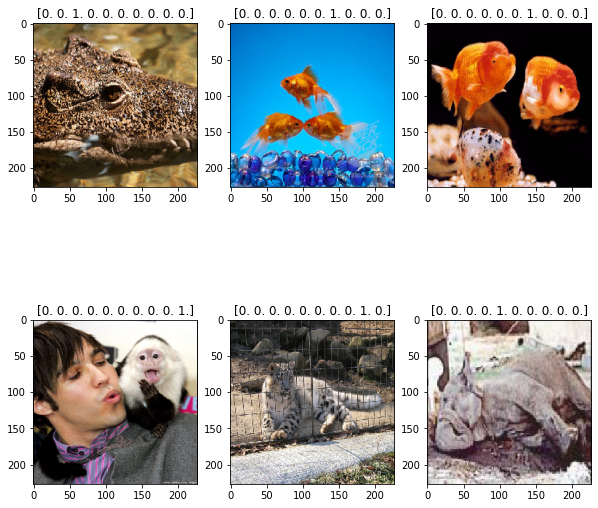

In [33]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(test[0][0][12])
axs[0][0].set_title(test[0][1][12])
axs[0][1].imshow(test[0][0][10])
axs[0][1].set_title(test[0][1][10])
axs[0][2].imshow(test[0][0][5])
axs[0][2].set_title(test[0][1][5])
axs[1][0].imshow(test[0][0][20])
axs[1][0].set_title(test[0][1][20])
axs[1][1].imshow(test[0][0][25])
axs[1][1].set_title(test[0][1][25])
axs[1][2].imshow(test[0][0][3])
axs[1][2].set_title(test[0][1][3])

In [38]:
def AlexNet(input_shape):
    
    Y_input = Input(input_shape)
    
    Y = Conv2D(96,(11,11),strides = 4,name="conv0")(Y_input)
    Y = BatchNormalization(axis = 3 , name = "bn0")(Y)
    Y = Activation('relu')(Y)
    
    Y = MaxPooling2D((3,3),strides = 2,name = 'max0')(Y)
    
    Y = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(Y)
    Y = BatchNormalization(axis = 3 ,name='bn1')(Y)
    Y = Activation('relu')(Y)
    
    Y = MaxPooling2D((3,3),strides = 2,name = 'max1')(Y)
    
    Y = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(Y)
    Y = BatchNormalization(axis = 3, name = 'bn2')(Y)
    Y = Activation('relu')(Y)
    
    Y = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(Y)
    Y = BatchNormalization(axis = 3, name = 'bn3')(Y)
    Y = Activation('relu')(Y)
    
    Y = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(Y)
    Y = BatchNormalization(axis = 3, name = 'bn4')(Y)
    Y = Activation('relu')(Y)
    
    Y = MaxPooling2D((3,3),strides = 2,name = 'max2')(Y)
    
    Y = Flatten()(Y)
    
    Y = Dense(4096, activation = 'relu', name = "fc0")(Y)
    
    Y = Dense(4096, activation = 'relu', name = 'fc1')(Y) 
    
    Y = Dense(10,activation='softmax',name = 'fc2')(Y)
    
    model = Model(inputs = Y_input, outputs = Y, name='AlexNet')
    return model

In [39]:
alex = AlexNet(test[0][0].shape[1:])

In [40]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation_10 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024

In [41]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])


In [46]:
alex.fit(test,epochs=100)

Epoch 1/100
32/32 [==============================] - 6s 191ms/step - loss: 1.4916 - accuracy: 0.4580
Epoch 2/100
32/32 [==============================] - 6s 197ms/step - loss: 1.5145 - accuracy: 0.4720
Epoch 3/100
32/32 [==============================] - 6s 193ms/step - loss: 1.3612 - accuracy: 0.5050
Epoch 4/100
32/32 [==============================] - 6s 195ms/step - loss: 1.5593 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 7s 209ms/step - loss: 1.4758 - accuracy: 0.4530
Epoch 6/100
32/32 [==============================] - 6s 198ms/step - loss: 1.3704 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 6s 195ms/step - loss: 1.2648 - accuracy: 0.5210
Epoch 8/100
32/32 [==============================] - 6s 190ms/step - loss: 1.1942 - accuracy: 0.5400
Epoch 9/100
32/32 [==============================] - 6s 193ms/step - loss: 1.2633 - accuracy: 0.5270
Epoch 10/100
32/32 [==============================] - 7s 202ms/step - loss: 1.1470 - accura

In [91]:
loss, accuracy = alex.fit(test,epochs=1)
print(alex.fit(test,epochs=1))

32/32 [==============================] - 6s 188ms/step - loss: 0.2683 - accuracy: 0.9090


TypeError: cannot unpack non-iterable History object

# Prediction

In [77]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as pl
print(tf.__version__)

2.6.4


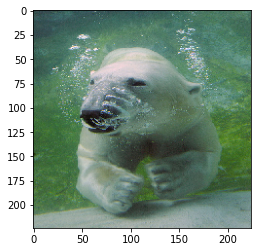

In [81]:
img = image.load_img(img_path, target_size=(224, 224))
img_path = "../input/imagenetsmall/test_set/test_set/test_set/bear/n02131653_5566.JPEG"
plt.imshow(img)
plt.show()

In [82]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [83]:
img_preprocessed = preprocess_input(img_batch)

In [84]:
models = tf.keras.applications.resnet50.ResNet50()

102981632/102967424 [==============================] - 1s 0us/step


In [86]:
prediction = models.predict(img_preprocessed)
print(decode_predictions(prediction, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
[('n02134084', 'ice_bear', 0.9853875), ('n02074367', 'dugong', 0.010144772), ('n02398521', 'hippopotamus', 0.0020837737)]


The END
